# Review Sentiment Prediction

This is a binary classification problem where you need to predict whether the review sentiment is positive or negative

### Data Dictionary

 - **id**: Unique identifier for each tuple
 - **category**: The reviews have been categorized into two categories representing positive and negative reviews. 0 represents positive reviews and 1 represents negative reviews.
 - **text**: Tokenized text content of the review
 
### Evaluation Metric

 - Submissions are evaluated using [Precision_Score(Macro)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#:~:text=The%20precision%20is%20the%20ratio,the%20worst%20value%20is%200.)
 
 - e.g. ```precision_score(y_true, y_pred, average='macro')```

## 1. Import the packages

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample, shuffle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

## 2. Read the data

In [2]:
df = pd.read_csv('TRAIN.csv')
df.head()

,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


In [3]:
df.shape

(2598, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2598 non-null   int64 
 1   text      2598 non-null   object
 2   category  2598 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 50.8+ KB


In [5]:
df['category'].value_counts()

0    2512
1      86
Name: category, dtype: int64

In [38]:
df['text'].head()

0                         1047 6700 4178 2912 183 6700
1    4035 4563 1994 154 5373 4956 6035 4393 4017 40...
2           5035 7685 3139 4407 254 584 6589 8518 3078
3    1047 2540 2578 6700 2242 230 3771 4676 5881 64...
4                              7685 5868 237 6794 3078
Name: text, dtype: object

In [54]:
train, test = train_test_split(df, test_size=0.2, stratify=df['category'], random_state=42)
print(train.shape, test.shape)

(2078, 3) (520, 3)


In [61]:
cv = CountVectorizer(binary=True, min_df = 10, max_df = 0.95)
cv.fit_transform(train['text'].values)
X_train = cv.transform(train['text'].values)
X_test = cv.transform(test['text'].values)

print(X_train.shape, X_test.shape)

(2078, 529) (520, 529)


In [62]:
y_train = train['category'].values
y_test = test['category'].values

print(y_train.shape, y_test.shape)

(2078,) (520,)


## Handle class imbalance

In [59]:
# # Applying SMOTE
# from imblearn.over_sampling import SMOTE

# print('Shape of train dataset before applying SMOTE:', X_train.shape)

# X_train, y_train = SMOTE().fit_resample(X_train, y_train)

# print('Shape of train dataset after applying SMOTE:', X_train.shape)

#### 1. Logistic Regression

In [63]:
# Initialize the logistic regression model
lr = LogisticRegression() #LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)

# Fit the data
lr.fit(X_train, y_train)

# Find out the predictions
y_pred = lr.predict(X_test)

# Evaluate the precision score
print('Training precision score: ', precision_score(y_train, lr.predict(X_train), average='macro'))
print('Validation precision score: ', precision_score(y_test, y_pred, average='macro'))

Training precision score:  0.9980168567178979
Validation precision score:  0.9970355731225297


In [64]:
df_test = pd.read_csv('TEST.csv')
df_test.head()

,id,text
0,1546,5222 7526 427 4829 7526 1164 4768 997 7924 332...
1,2956,590 983 5773 8352 1803 237 5045 6300 6267 5773...
2,4248,5915 4871 2982 6310 2734 3581 5773 6498 5773
3,4403,5435 1994 7248 1944 4017 3567 8618 5018 6619 3...
4,2097,6666 230 4768 2684 5773 3656 907 5922 2295 577...


In [65]:
cv.transform(df_test['text'].values)

<866x529 sparse matrix of type '<class 'numpy.int64'>'
	with 8810 stored elements in Compressed Sparse Row format>

In [66]:
y_pred = lr.predict(cv.transform(df_test['text'].values))
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

<AxesSubplot:xlabel='category'>

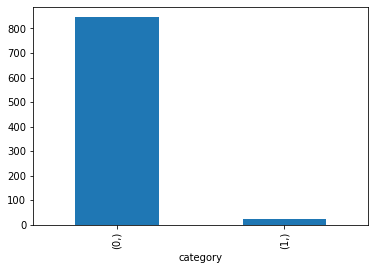

In [67]:
Predicted_Y = pd.DataFrame(y_pred)
Predicted_Y.columns = ['category']

Predicted_Y.value_counts().plot.bar()
#Predicted_Y.head()

In [68]:
# Write Final preds
Predicted_Y.to_csv("./submission.csv", index=False)